In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/Datos/archive.zip

Archive:  /content/drive/MyDrive/Datos/archive.zip
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv  


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [5]:
data.isna().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

Tenemos muchos datos nulos por lo que nos conviene eliminarlos

In [6]:
data.dropna(inplace=True)

In [7]:
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


Ahora arreglaremos la columna timestamp para poder ver una fecha reconocible

In [8]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'],unit='s')
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


Realizaremos nuestro entrenamiento respecto a la columna Close

Para realizar el entranamiento separaremos nuestros datos en train y test, para train usamos los 3 primeros años y como test usaremos los ultimo 6 meses

In [9]:
X_train = data[['Open', 'High','Low', 'Close', 'Volume_(BTC)','Volume_(Currency)','Weighted_Price']][data['Timestamp'].between(pd.to_datetime('2017-01-01 01:00:0'),pd.to_datetime('2020-09-30 00:00:00'))]
y_train = data[['Close']][data['Timestamp'].between(pd.to_datetime('2017-01-01 01:00:0'),pd.to_datetime('2020-09-30 00:00:00'))]


X_test = data[['Open', 'High','Low', 'Close', 'Volume_(BTC)','Volume_(Currency)','Weighted_Price']][data['Timestamp']>pd.to_datetime('2020-09-30 00:00:00')]
y_test = data[['Close']][data['Timestamp']>pd.to_datetime('2020-09-30 00:00:00')]

btc_train = data[['Close']][data['Timestamp'].between(pd.to_datetime('2017-01-01 01:00:0'),pd.to_datetime('2020-09-30 00:00:00'))]
btc_test = data[['Close']][data['Timestamp']>pd.to_datetime('2020-09-30 00:00:00')]

print(X_train.shape, y_train.shape)



(1883669, 7) (1883669, 1)


In [10]:
print(X_test.shape, y_test.shape)


(260663, 7) (260663, 1)


In [11]:
print(btc_train.shape, btc_test.shape)

(1883669, 1) (260663, 1)


Ahora pasamos a escalar nuestros datos

In [12]:
scaler = StandardScaler()
sc = scaler.fit(X_train)

train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(train_sc)
X_train_sc.columns = X_train.columns

test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(test_sc)
X_test_sc.columns = X_test.columns

In [13]:
# Esta función agrupa los instantes de tiempo en bloques de tamaño `time_steps`
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []

    for i in range(len(X) - time_steps):
      v = X.iloc[i:(i + time_steps)].values
      Xs.append(v)
      ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [14]:
time_steps = 12


X_train_shape, y_train_shape = create_dataset(X_train_sc, y_train, time_steps)
X_test_shape, y_test_shape = create_dataset(X_test_sc, y_test, time_steps)

X_btc_train_shape, y_btc_train_shape = create_dataset(btc_train, y_train, time_steps)
X_btc_test_shape, y_btc_test_shape = create_dataset(btc_test, y_test, time_steps)

print(X_train_shape.shape, y_train.shape)
print(X_test_shape.shape, y_test.shape)

print(X_btc_train_shape.shape, y_btc_train_shape.shape)
print(X_btc_test_shape.shape, y_btc_test_shape.shape)

(1883657, 12, 7) (1883669, 1)
(260651, 12, 7) (260663, 1)
(1883657, 12, 1) (1883657, 1)
(260651, 12, 1) (260651, 1)


#RNN

In [15]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1
Rnn_model = Sequential()
Rnn_model.add(SimpleRNN(16,activation='relu', kernel_regularizer=l1(0.01), input_shape = (X_train_shape.shape[1], X_train_shape.shape[2])))
Rnn_model.add(Dense(1))

Rnn_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanAbsolutePercentageError()])
history_rnn_all = Rnn_model.fit(X_train_shape, y_train_shape, validation_data = (X_test_shape, y_test_shape),steps_per_epoch=1000, epochs=20, batch_size = 100)

ypred_rnn_shape = Rnn_model.predict(X_test_shape)

_, mae_tr, mape_tr = Rnn_model.evaluate(X_train_shape, y_train_shape)
_, mae_ts, mape_ts = Rnn_model.evaluate(X_test_shape, y_test_shape)
print('MAE train: %.2f; MAPE train: %.2f' % (mae_tr, mape_tr))
print('MAE test: %.2f; MAPE test: %.2f' % (mae_ts, mape_ts))

Epoch 1/20
1000/1000 [==============================] - 25s 20ms/step - loss: 7292592.5000 - mean_absolute_error: 1319.4725 - mean_absolute_percentage_error: 25.1106 - val_loss: 2323472.2500 - val_mean_absolute_error: 1055.0854 - val_mean_absolute_percentage_error: 2.5681
Epoch 2/20
1000/1000 [==============================] - 20s 20ms/step - loss: 46719.8711 - mean_absolute_error: 131.3964 - mean_absolute_percentage_error: 3.2433 - val_loss: 2370794.5000 - val_mean_absolute_error: 1115.1526 - val_mean_absolute_percentage_error: 2.8969
Epoch 3/20
1000/1000 [==============================] - 19s 19ms/step - loss: 20295.6348 - mean_absolute_error: 92.3046 - mean_absolute_percentage_error: 1.9670 - val_loss: 3988547.5000 - val_mean_absolute_error: 1427.7006 - val_mean_absolute_percentage_error: 3.4636
Epoch 4/20
1000/1000 [==============================] - 21s 21ms/step - loss: 9206.0166 - mean_absolute_error: 66.1089 - mean_absolute_percentage_error: 1.3756 - val_loss: 3977062.7500 - val

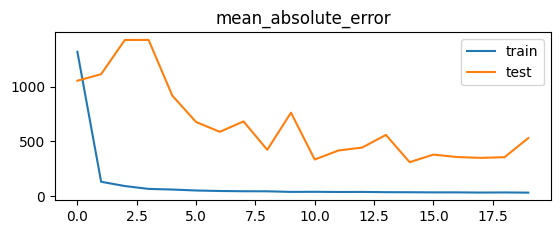

In [16]:
plt.subplot(211)
plt.title('mean_absolute_error')
plt.plot(history_rnn_all.history['mean_absolute_error'], label='train')
plt.plot(history_rnn_all.history['val_mean_absolute_error'], label='test')
plt.legend()

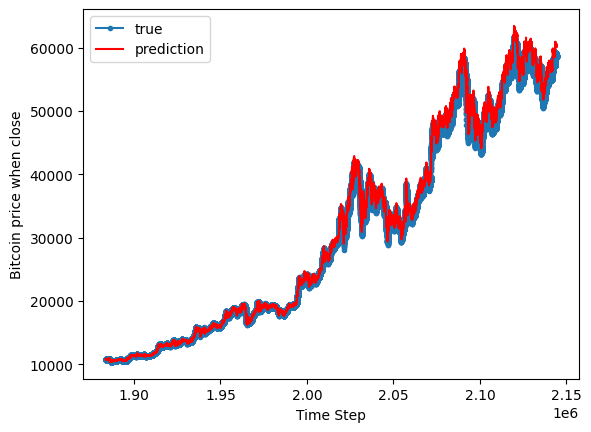

In [17]:
plt.plot(np.arange(len(y_train_shape), len(y_train_shape) + len(y_test_shape)), y_test_shape.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train_shape), len(y_train_shape) + len(y_test_shape)), ypred_rnn_shape.flatten(), 'r', label="prediction")
plt.ylabel('Bitcoin price when close')
plt.xlabel('Time Step')
plt.legend()
plt.show();

Podemos ver como nuestra gráfica no está  del todo equivocada per tiene una tendencia diferente a la del test. Además tenemos algo de overfitting.

In [18]:
rnn_model_only = Sequential()
rnn_model_only.add(SimpleRNN(16,activation ='relu', kernel_regularizer=l1(0.01), input_shape = (X_btc_train_shape.shape[1], X_btc_train_shape.shape[2])))
rnn_model_only.add(Dense(1))

rnn_model_only.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanAbsolutePercentageError()])

history_rnn_only = rnn_model_only.fit(X_btc_train_shape, y_btc_train_shape, validation_data = (X_btc_test_shape, y_btc_test_shape),steps_per_epoch=1000, epochs=20, batch_size = 100)

ypred_rnn_only = rnn_model_only.predict(X_btc_test_shape)

_, mae_tr, mape_tr = rnn_model_only.evaluate(X_btc_train_shape, y_btc_train_shape)
_, mae_ts, mape_ts = rnn_model_only.evaluate(X_btc_test_shape, y_btc_test_shape)
print('MAE train: %.2f; MAPE train: %.2f' % (mae_tr, mape_tr))
print('MAE test: %.2f; MAPE test: %.2f' % (mae_ts, mape_ts))

Epoch 1/20
1000/1000 [==============================] - 22s 21ms/step - loss: 297161.9062 - mean_absolute_error: 104.6916 - mean_absolute_percentage_error: 1.5145 - val_loss: 4719.8789 - val_mean_absolute_error: 39.1483 - val_mean_absolute_percentage_error: 0.1155
Epoch 2/20
1000/1000 [==============================] - 22s 22ms/step - loss: 230.0841 - mean_absolute_error: 7.5918 - mean_absolute_percentage_error: 0.1066 - val_loss: 4783.3374 - val_mean_absolute_error: 39.6667 - val_mean_absolute_percentage_error: 0.1176
Epoch 3/20
1000/1000 [==============================] - 21s 21ms/step - loss: 233.5712 - mean_absolute_error: 7.6771 - mean_absolute_percentage_error: 0.1078 - val_loss: 4737.6875 - val_mean_absolute_error: 39.3662 - val_mean_absolute_percentage_error: 0.1163
Epoch 4/20
1000/1000 [==============================] - 22s 22ms/step - loss: 238.7998 - mean_absolute_error: 7.8211 - mean_absolute_percentage_error: 0.1100 - val_loss: 6209.2515 - val_mean_absolute_error: 51.1103 

De esta forma hemos reducido mucho el error

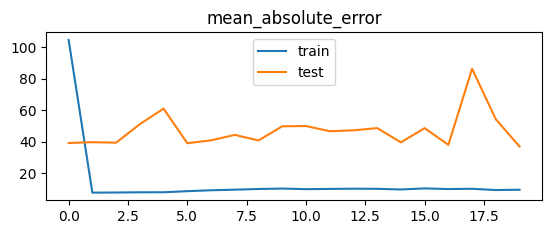

In [19]:
plt.subplot(211)
plt.title('mean_absolute_error')
plt.plot(history_rnn_only.history['mean_absolute_error'], label='train')
plt.plot(history_rnn_only.history['val_mean_absolute_error'], label='test')
plt.legend()

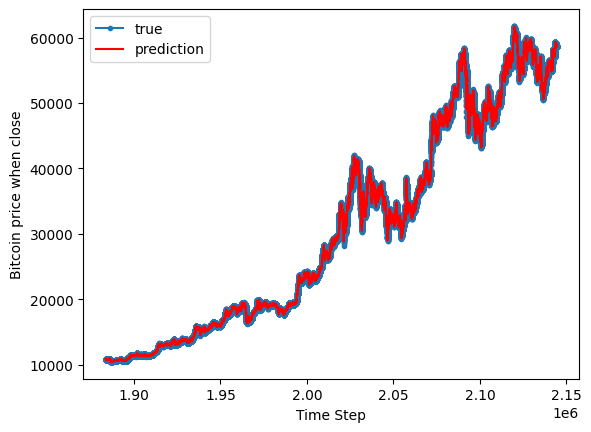

In [20]:
plt.plot(np.arange(len(y_btc_train_shape), len(y_btc_train_shape) + len(y_btc_test_shape)), y_btc_test_shape.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_btc_train_shape), len(y_btc_train_shape) + len(y_btc_test_shape)), ypred_rnn_only.flatten(), 'r', label="prediction")
plt.ylabel('Bitcoin price when close')
plt.xlabel('Time Step')
plt.legend()
plt.show();

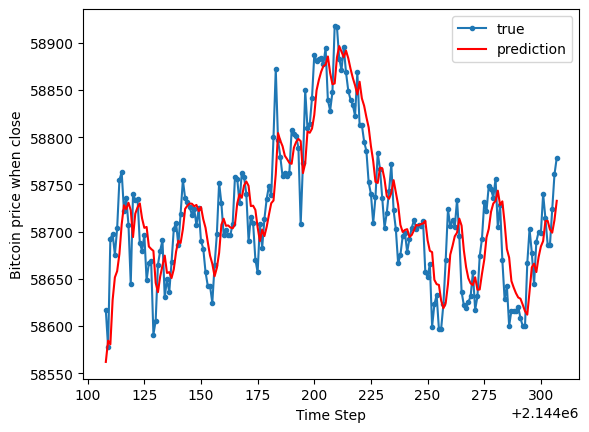

In [21]:
plt.plot(np.arange(len(y_btc_train_shape), len(y_btc_train_shape) + len(y_btc_test_shape))[-200:], y_btc_test_shape.flatten()[-200:], marker='.', label="true")
plt.plot(np.arange(len(y_btc_train_shape), len(y_btc_train_shape) + len(y_btc_test_shape))[-200:], ypred_rnn_only.flatten()[-200:], 'r', label="prediction")
plt.ylabel('Bitcoin price when close')
plt.xlabel('Time Step')
plt.legend()
plt.show();

Por lo que vemos el entrenamiento funciona mejor utilizando solo Close

In [22]:
rnn_model_all=Sequential()
rnn_model_all.add(SimpleRNN(50,activation='relu', kernel_regularizer=l1(0.01), input_shape = (X_btc_train_shape.shape[1], X_btc_train_shape.shape[2])))
rnn_model_all.add(Dropout(0.2))
rnn_model_all.add(Dense(1))

rnn_model_all.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanAbsolutePercentageError()])

history_rnn_only = rnn_model_all.fit(X_btc_train_shape, y_btc_train_shape, validation_data = (X_btc_test_shape, y_btc_test_shape),steps_per_epoch=5000, epochs=10, batch_size = 100)

ypred_rnn_only = rnn_model_all.predict(X_btc_test_shape)

_, mae_tr, mape_tr = rnn_model_all.evaluate(X_btc_train_shape, y_btc_train_shape)
_, mae_ts, mape_ts = rnn_model_all.evaluate(X_btc_test_shape, y_btc_test_shape)
print('MAE train: %.2f; MAPE train: %.2f' % (mae_tr, mape_tr))
print('MAE test: %.2f; MAPE test: %.2f' % (mae_ts, mape_ts))

Epoch 1/10
5000/5000 [==============================] - 73s 14ms/step - loss: 789417.5625 - mean_absolute_error: 623.1808 - mean_absolute_percentage_error: 8.9193 - val_loss: 788502.7500 - val_mean_absolute_error: 785.5239 - val_mean_absolute_percentage_error: 2.5684
Epoch 2/10
5000/5000 [==============================] - 67s 13ms/step - loss: 686476.8750 - mean_absolute_error: 594.2836 - mean_absolute_percentage_error: 8.5134 - val_loss: 40848.7148 - val_mean_absolute_error: 174.1343 - val_mean_absolute_percentage_error: 0.5752
Epoch 3/10
5000/5000 [==============================] - 72s 14ms/step - loss: 661380.0000 - mean_absolute_error: 585.3574 - mean_absolute_percentage_error: 8.3698 - val_loss: 372954.2188 - val_mean_absolute_error: 540.9039 - val_mean_absolute_percentage_error: 1.7789
Epoch 4/10
5000/5000 [==============================] - 68s 14ms/step - loss: 654780.5000 - mean_absolute_error: 583.2014 - mean_absolute_percentage_error: 8.3456 - val_loss: 12936.3428 - val_mean_

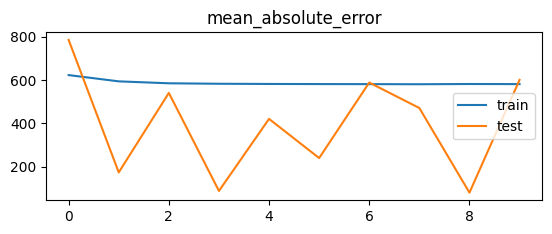

In [23]:
plt.subplot(211)
plt.title('mean_absolute_error')
plt.plot(history_rnn_only.history['mean_absolute_error'], label='train')
plt.plot(history_rnn_only.history['val_mean_absolute_error'], label='test')
plt.legend()

Esta red es más compleja pero podemos ver como no da mejores resultados ni aun teniendo una capa de Dropout para evitar el overfitting

#LSTM

In [24]:
lstm_model=Sequential()
lstm_model.add(LSTM(16,activation='relu', kernel_regularizer=l1(0.01),return_sequences=True, input_shape = (X_train_shape.shape[1], X_train_shape.shape[2])))
lstm_model.add(Dense(1))

lstm_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanAbsolutePercentageError()])
history = lstm_model.fit(X_train_shape, y_train_shape, validation_data = (X_test_shape, y_test_shape),steps_per_epoch=1000, epochs=20, batch_size = 100)

ypred_shape = lstm_model.predict(X_test_shape)

_, mae_tr, mape_tr = lstm_model.evaluate(X_train_shape, y_train_shape)
_, mae_ts, mape_ts = lstm_model.evaluate(X_test_shape, y_test_shape)
print('MAE train: %.2f; MAPE train: %.2f' % (mae_tr, mape_tr))
print('MAE test: %.2f; MAPE test: %.2f' % (mae_ts, mape_ts))

Epoch 1/20
1000/1000 [==============================] - 50s 47ms/step - loss: 35078764.0000 - mean_absolute_error: 4692.4463 - mean_absolute_percentage_error: 68.9832 - val_loss: 375093056.0000 - val_mean_absolute_error: 13321.4941 - val_mean_absolute_percentage_error: 42.8780
Epoch 2/20
1000/1000 [==============================] - 50s 50ms/step - loss: 18591416.0000 - mean_absolute_error: 2711.2629 - mean_absolute_percentage_error: 41.1845 - val_loss: 274587552.0000 - val_mean_absolute_error: 10971.8730 - val_mean_absolute_percentage_error: 33.9407
Epoch 3/20
1000/1000 [==============================] - 47s 47ms/step - loss: 14861014.0000 - mean_absolute_error: 2243.3103 - mean_absolute_percentage_error: 34.1762 - val_loss: 306733440.0000 - val_mean_absolute_error: 12563.3398 - val_mean_absolute_percentage_error: 36.2738
Epoch 4/20
1000/1000 [==============================] - 40s 40ms/step - loss: 12452591.0000 - mean_absolute_error: 1877.4227 - mean_absolute_percentage_error: 29.0596

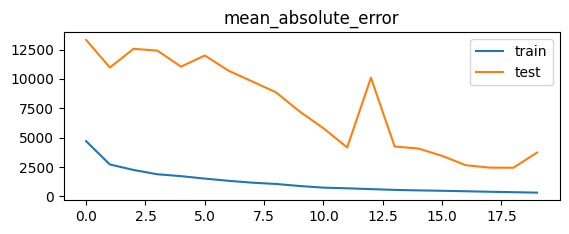

In [36]:
plt.subplot(211)
plt.title('mean_absolute_error')
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='test')
plt.legend()

Esta LSTM funciona peor que nuestra RNN aunque tiene una buena tendencia, probemos ahora con una LSTM mas compleja

In [38]:
lstm_model_complex=Sequential()
lstm_model_complex.add(LSTM(50,activation='relu',kernel_regularizer=l1(0.01), input_shape = (X_btc_train_shape.shape[1], X_btc_train_shape.shape[2])))
lstm_model_complex.add(Dropout(0.2))
lstm_model_complex.add(Dense(1))

lstm_model_complex.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanAbsolutePercentageError()])
history_only = lstm_model_complex.fit(X_btc_train_shape, y_btc_train_shape, validation_data = (X_btc_test_shape, y_btc_test_shape),steps_per_epoch=5000, epochs=20, batch_size = 100)

ypred_btc = lstm_model_complex.predict(X_btc_test_shape)

_, mae_tr, mape_tr = lstm_model_complex.evaluate(X_btc_train_shape, y_btc_train_shape)
_, mae_ts, mape_ts = lstm_model_complex.evaluate(X_btc_test_shape, y_btc_test_shape)
print('MAE train: %.2f; MAPE train: %.2f' % (mae_tr, mape_tr))
print('MAE test: %.2f; MAPE test: %.2f' % (mae_ts, mape_ts))


Epoch 1/20
5000/5000 [==============================] - 159s 31ms/step - loss: 1675340.2500 - mean_absolute_error: 910.6777 - mean_absolute_percentage_error: 13.0373 - val_loss: 320144.7812 - val_mean_absolute_error: 485.8052 - val_mean_absolute_percentage_error: 1.5859
Epoch 2/20
5000/5000 [==============================] - 138s 28ms/step - loss: 1618575.3750 - mean_absolute_error: 924.9414 - mean_absolute_percentage_error: 13.2497 - val_loss: 523220.2500 - val_mean_absolute_error: 630.6929 - val_mean_absolute_percentage_error: 2.0559
Epoch 3/20
5000/5000 [==============================] - 141s 28ms/step - loss: 1495965.1250 - mean_absolute_error: 874.9496 - mean_absolute_percentage_error: 12.5109 - val_loss: 22628.6641 - val_mean_absolute_error: 102.3459 - val_mean_absolute_percentage_error: 0.3326
Epoch 4/20
5000/5000 [==============================] - 152s 30ms/step - loss: 1804828.2500 - mean_absolute_error: 906.9781 - mean_absolute_percentage_error: 12.9795 - val_loss: 675306.750

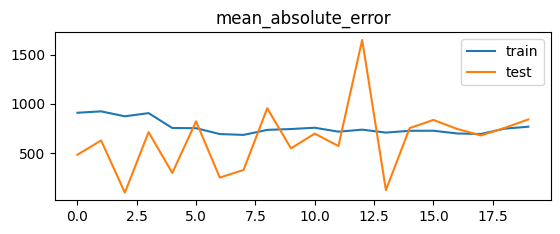

In [39]:
plt.subplot(211)
plt.title('mean_absolute_error')
plt.plot(history_only.history['mean_absolute_error'], label='train')
plt.plot(history_only.history['val_mean_absolute_error'], label='test')
plt.legend()

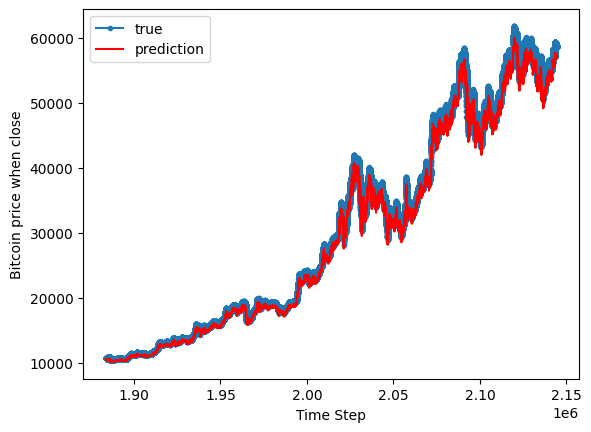

In [40]:
plt.plot(np.arange(len(y_btc_train_shape), len(y_btc_train_shape) + len(y_btc_test_shape)), y_btc_test_shape.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_btc_train_shape), len(y_btc_train_shape) + len(y_btc_test_shape)), ypred_btc.flatten(), 'r', label="prediction")
plt.ylabel('Bitcoin price when close')
plt.xlabel('Time Step')
plt.legend()
plt.show();

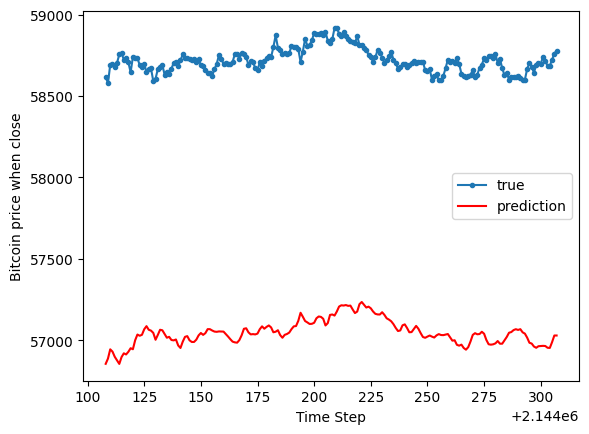

In [41]:
plt.plot(np.arange(len(y_btc_train_shape), len(y_btc_train_shape) + len(y_btc_test_shape))[-200:], y_btc_test_shape.flatten()[-200:], marker='.', label="true")
plt.plot(np.arange(len(y_btc_train_shape), len(y_btc_train_shape) + len(y_btc_test_shape))[-200:], ypred_btc.flatten()[-200:], 'r', label="prediction")
plt.ylabel('Bitcoin price when close')
plt.xlabel('Time Step')
plt.legend()
plt.show();

Igual que como pasaba antes, al usar el Dropout perdemos precisión

#GRU

In [42]:
gru_model_sh=Sequential()
gru_model_sh.add(GRU(16,activation='relu',kernel_regularizer=l1(0.01), input_shape = (X_btc_train_shape.shape[1], X_btc_train_shape.shape[2])))
gru_model_sh.add(Dropout(0.2))
gru_model_sh.add(Dense(1))

gru_model_sh.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanAbsolutePercentageError()])
history_only = gru_model_sh.fit(X_btc_train_shape, y_btc_train_shape, validation_data = (X_btc_test_shape, y_btc_test_shape), epochs=10, batch_size = 100)

ypred_btc = gru_model_sh.predict(X_btc_test_shape)

_, mae_tr, mape_tr = gru_model_sh.evaluate(X_btc_train_shape, y_btc_train_shape)
_, mae_ts, mape_ts = gru_model_sh.evaluate(X_btc_test_shape, y_btc_test_shape)
print('MAE train: %.2f; MAPE train: %.2f' % (mae_tr, mape_tr))
print('MAE test: %.2f; MAPE test: %.2f' % (mae_ts, mape_ts))

Epoch 1/10
18837/18837 [==============================] - 616s 33ms/step - loss: 1982710.6250 - mean_absolute_error: 1006.4676 - mean_absolute_percentage_error: 14.4016 - val_loss: 1401037.0000 - val_mean_absolute_error: 1044.1331 - val_mean_absolute_percentage_error: 3.4020
Epoch 2/10
18837/18837 [==============================] - 617s 33ms/step - loss: 1668167.8750 - mean_absolute_error: 946.9295 - mean_absolute_percentage_error: 13.5384 - val_loss: 454604.1875 - val_mean_absolute_error: 587.2121 - val_mean_absolute_percentage_error: 1.8928
Epoch 3/10
18837/18837 [==============================] - 610s 32ms/step - loss: 1489543.7500 - mean_absolute_error: 873.7004 - mean_absolute_percentage_error: 12.4570 - val_loss: 357868.9688 - val_mean_absolute_error: 517.4998 - val_mean_absolute_percentage_error: 1.6527
Epoch 4/10
18837/18837 [==============================] - 637s 34ms/step - loss: 1454941.5000 - mean_absolute_error: 859.2206 - mean_absolute_percentage_error: 12.2433 - val_loss

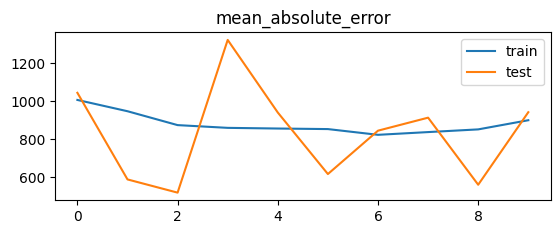

In [43]:
plt.subplot(211)
plt.title('mean_absolute_error')
plt.plot(history_only.history['mean_absolute_error'], label='train')
plt.plot(history_only.history['val_mean_absolute_error'], label='test')
plt.legend()

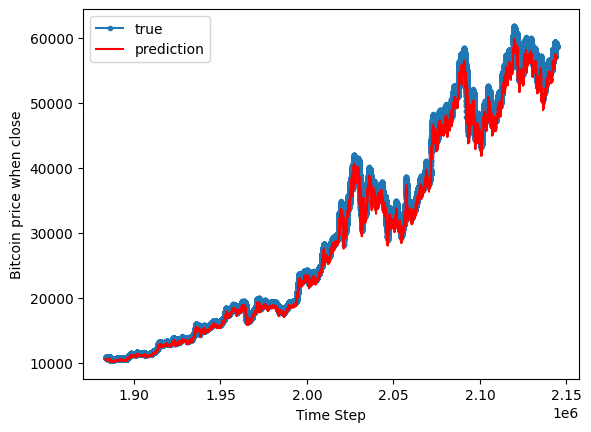

In [44]:
plt.plot(np.arange(len(y_btc_train_shape), len(y_btc_train_shape) + len(y_btc_test_shape)), y_btc_test_shape.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_btc_train_shape), len(y_btc_train_shape) + len(y_btc_test_shape)), ypred_btc.flatten(), 'r', label="prediction")
plt.ylabel('Bitcoin price when close')
plt.xlabel('Time Step')
plt.legend()
plt.show();

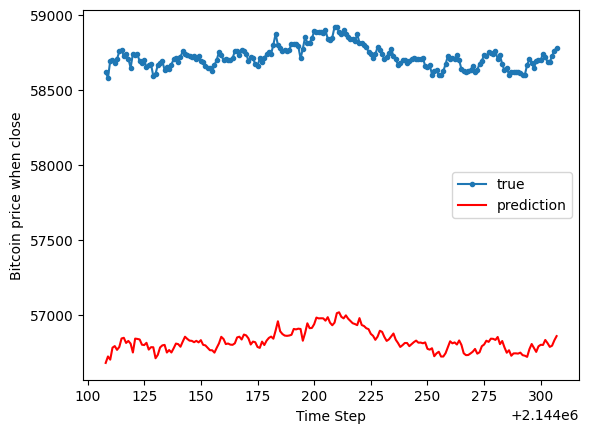

In [45]:
plt.plot(np.arange(len(y_btc_train_shape), len(y_btc_train_shape) + len(y_btc_test_shape))[-200:], y_btc_test_shape.flatten()[-200:], marker='.', label="true")
plt.plot(np.arange(len(y_btc_train_shape), len(y_btc_train_shape) + len(y_btc_test_shape))[-200:], ypred_btc.flatten()[-200:], 'r', label="prediction")
plt.ylabel('Bitcoin price when close')
plt.xlabel('Time Step')
plt.legend()
plt.show();

Vemos como esta GRU predice de manera muy parecida a nuestra LSTM por lo que podriamos intuir que quitando la capa de Dropout tambien conseguiremos mejor precisión

#Conclusion

Como conclusión a nuestros distintos análisis con diferentes tipos de modelos y capas vemos que para estos datos en concreto funcionan mejor las redes GRU y LSTM  que uan red recurrente simple.